<h1 align = 'center'>Dynamic Ensemble Models Research </h1>

### Lakshmi Priya Ramisetty - lramiset@mail.yu.edu
### Namrataben Patel- npatel13@mail.yu.edu

<h4> We have done both numerical differentiation and gradient formula calculated in each task </h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#### Data Loading

In [2]:
def load_csv_data(file_url):
    return pd.read_csv(file_url)

# PROGRAM EXECUTION
try:
    # It will read the CSV file from the given URL and convert it into Data Frame.
    df_main = load_csv_data("allwine.csv")
    print(f"Data Loading completed. This dataset contains {len(df_main)} rows and {len(df_main.columns)} columns.")
except Exception as e:
    print(f"An error occurred: {e}")

Data Loading completed. This dataset contains 3198 rows and 12 columns.


In [3]:
features = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol']
target_variable = 'quality'



#### Data Summary

In [4]:
# Get overview of the data
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3198 non-null   int64  
 1   fixed acidity        3198 non-null   float64
 2   volatile acidity     3198 non-null   float64
 3   citric acid          3198 non-null   float64
 4   residual sugar       3198 non-null   float64
 5   chlorides            3198 non-null   float64
 6   free sulfur dioxide  3198 non-null   float64
 7   density              3198 non-null   float64
 8   pH                   3198 non-null   float64
 9   sulphates            3198 non-null   float64
 10  alcohol              3198 non-null   float64
 11  quality              3198 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 299.9 KB


In [5]:
df_main.head()

Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0           0      -0.743787          0.805266    -1.455948       -0.541531   
1           1      -0.520914          1.798500    -1.455948       -0.047918   
2           2      -0.520914          1.136344    -1.251203       -0.259467   
3           3       1.373509         -1.512280     1.410480       -0.541531   
4           4      -0.743787          0.805266    -1.455948       -0.541531   

   chlorides  free sulfur dioxide   density        pH  sulphates   alcohol  \
0  -0.334525            -0.539436 -0.978159  0.146723  -0.755850 -1.297136   
1   0.129345             0.787432 -0.998211 -1.220838  -0.062351 -0.960761   
2   0.002835            -0.160331 -0.994200 -0.956148  -0.235726 -0.960761   
3  -0.355610             0.029222 -0.974148 -1.397297  -0.640267 -0.960761   
4  -0.334525            -0.539436 -0.978159  0.146723  -0.755850 -1.297136   

   quality  
0        0  
1        0  
2        0  
3        1  
4        0

In [6]:
df_main.describe()

Unnamed: 0  fixed acidity  volatile acidity   citric acid  \
count  3198.000000   3.198000e+03      3.198000e+03  3.198000e+03   
mean   1598.500000  -3.732682e-16     -3.643809e-16  1.777468e-16   
std     923.327407   1.000156e+00      1.000156e+00  1.000156e+00   
min       0.000000  -2.303900e+00     -2.395155e+00 -1.623825e+00   
25%     799.250000  -6.880688e-01     -7.413923e-01 -9.041204e-01   
50%    1598.500000  -1.883037e-01     -3.776619e-02 -6.651164e-02   
75%    2397.750000   5.638545e-01      6.221545e-01  7.962457e-01   
max    3197.000000   4.580738e+00      5.932391e+00  3.824068e+00   

       residual sugar     chlorides  free sulfur dioxide       density  \
count    3.198000e+03  3.198000e+03         3.198000e+03  3.198000e+03   
mean     5.332403e-17 -1.777468e-16        -6.221137e-17 -1.848566e-15   
std      1.000156e+00  1.000156e+00         1.000156e+00  1.000156e+00   
min     -1.246692e+00 -1.683967e+00        -1.487200e+00 -1.133162e+00   
25%     -4.710149e-01 -3.766953e-01        -7.930922e-01 -9.992135e-01   
50%     -2.594666e-01 -1.744349e-01        -2.140109e-01 -7.166201e-04   
75%      6.705718e-02  8.597896e-02         5.481191e-01  9.990931e-01   
max      9.138676e+00  1.115258e+01         5.245422e+00  1.140202e+00   

                 pH     sulphates       alcohol      quality  
count  3.198000e+03  3.198000e+03  3.198000e+03  3198.000000  
mean   2.132961e-16 -3.377189e-16 -3.554936e-17     0.534709  
std    1.000156e+00  1.000156e+00  1.000156e+00     0.498872  
min   -3.250120e+00 -2.085055e+00 -2.138075e+00     0.000000  
25%   -7.796891e-01 -6.402666e-01 -7.137768e-01     0.000000  
50%   -2.683110e-03 -1.977143e-01 -1.262511e-01     1.000000  
75%    7.564772e-01  4.338530e-01  6.383188e-01     1.000000  
max    3.769595e+00  7.944553e+00  4.311531e+00     1.000000

In [7]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3198 non-null   int64  
 1   fixed acidity        3198 non-null   float64
 2   volatile acidity     3198 non-null   float64
 3   citric acid          3198 non-null   float64
 4   residual sugar       3198 non-null   float64
 5   chlorides            3198 non-null   float64
 6   free sulfur dioxide  3198 non-null   float64
 7   density              3198 non-null   float64
 8   pH                   3198 non-null   float64
 9   sulphates            3198 non-null   float64
 10  alcohol              3198 non-null   float64
 11  quality              3198 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 299.9 KB


In [8]:
# Count the number of null values in each column
null_counts = df_main.isnull().sum()

if sum(null_counts) <= 0:  # If no null values found then display a message and return
    print("No Null Values found.")

No Null Values found.


In [9]:
df_main['quality'].value_counts()

quality
1    1710
0    1488
Name: count, dtype: int64

In [10]:
df_main.head()

Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0           0      -0.743787          0.805266    -1.455948       -0.541531   
1           1      -0.520914          1.798500    -1.455948       -0.047918   
2           2      -0.520914          1.136344    -1.251203       -0.259467   
3           3       1.373509         -1.512280     1.410480       -0.541531   
4           4      -0.743787          0.805266    -1.455948       -0.541531   

   chlorides  free sulfur dioxide   density        pH  sulphates   alcohol  \
0  -0.334525            -0.539436 -0.978159  0.146723  -0.755850 -1.297136   
1   0.129345             0.787432 -0.998211 -1.220838  -0.062351 -0.960761   
2   0.002835            -0.160331 -0.994200 -0.956148  -0.235726 -0.960761   
3  -0.355610             0.029222 -0.974148 -1.397297  -0.640267 -0.960761   
4  -0.334525            -0.539436 -0.978159  0.146723  -0.755850 -1.297136   

   quality  
0        0  
1        0  
2        0  
3        1  
4        0

In [11]:
features = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol']
target_variable = 'quality'

df = df_main[features]

Total Duplicates=> 241


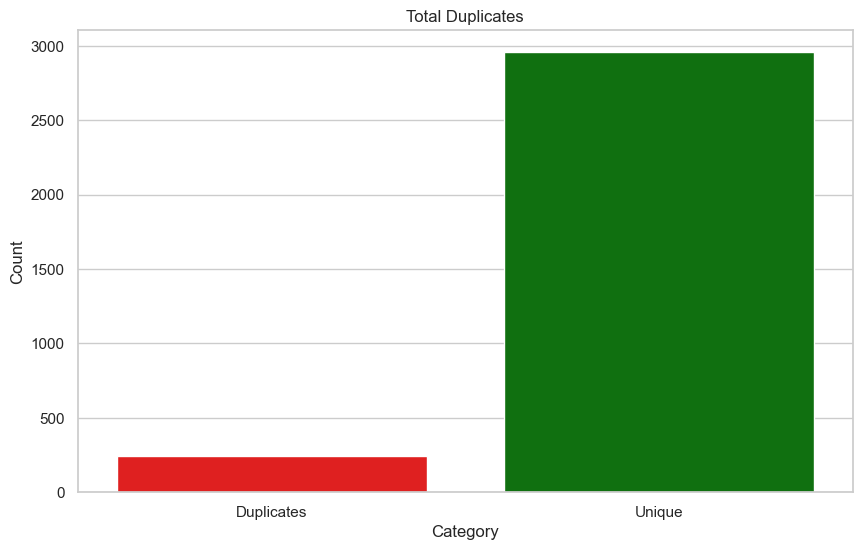

In [12]:
# Calculate duplicate and unique counts
duplicate_count = len(df_main[features]) - len(df_main[features].drop_duplicates())

print("Total Duplicates=>", duplicate_count)

# Assuming df is your DataFrame and duplicate_count is the count of duplicates
categories = ['Duplicates', 'Unique']
counts = [duplicate_count, len(df_main[features]) - duplicate_count]

# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=counts, palette=["red", "green"])
plt.title('Total Duplicates')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

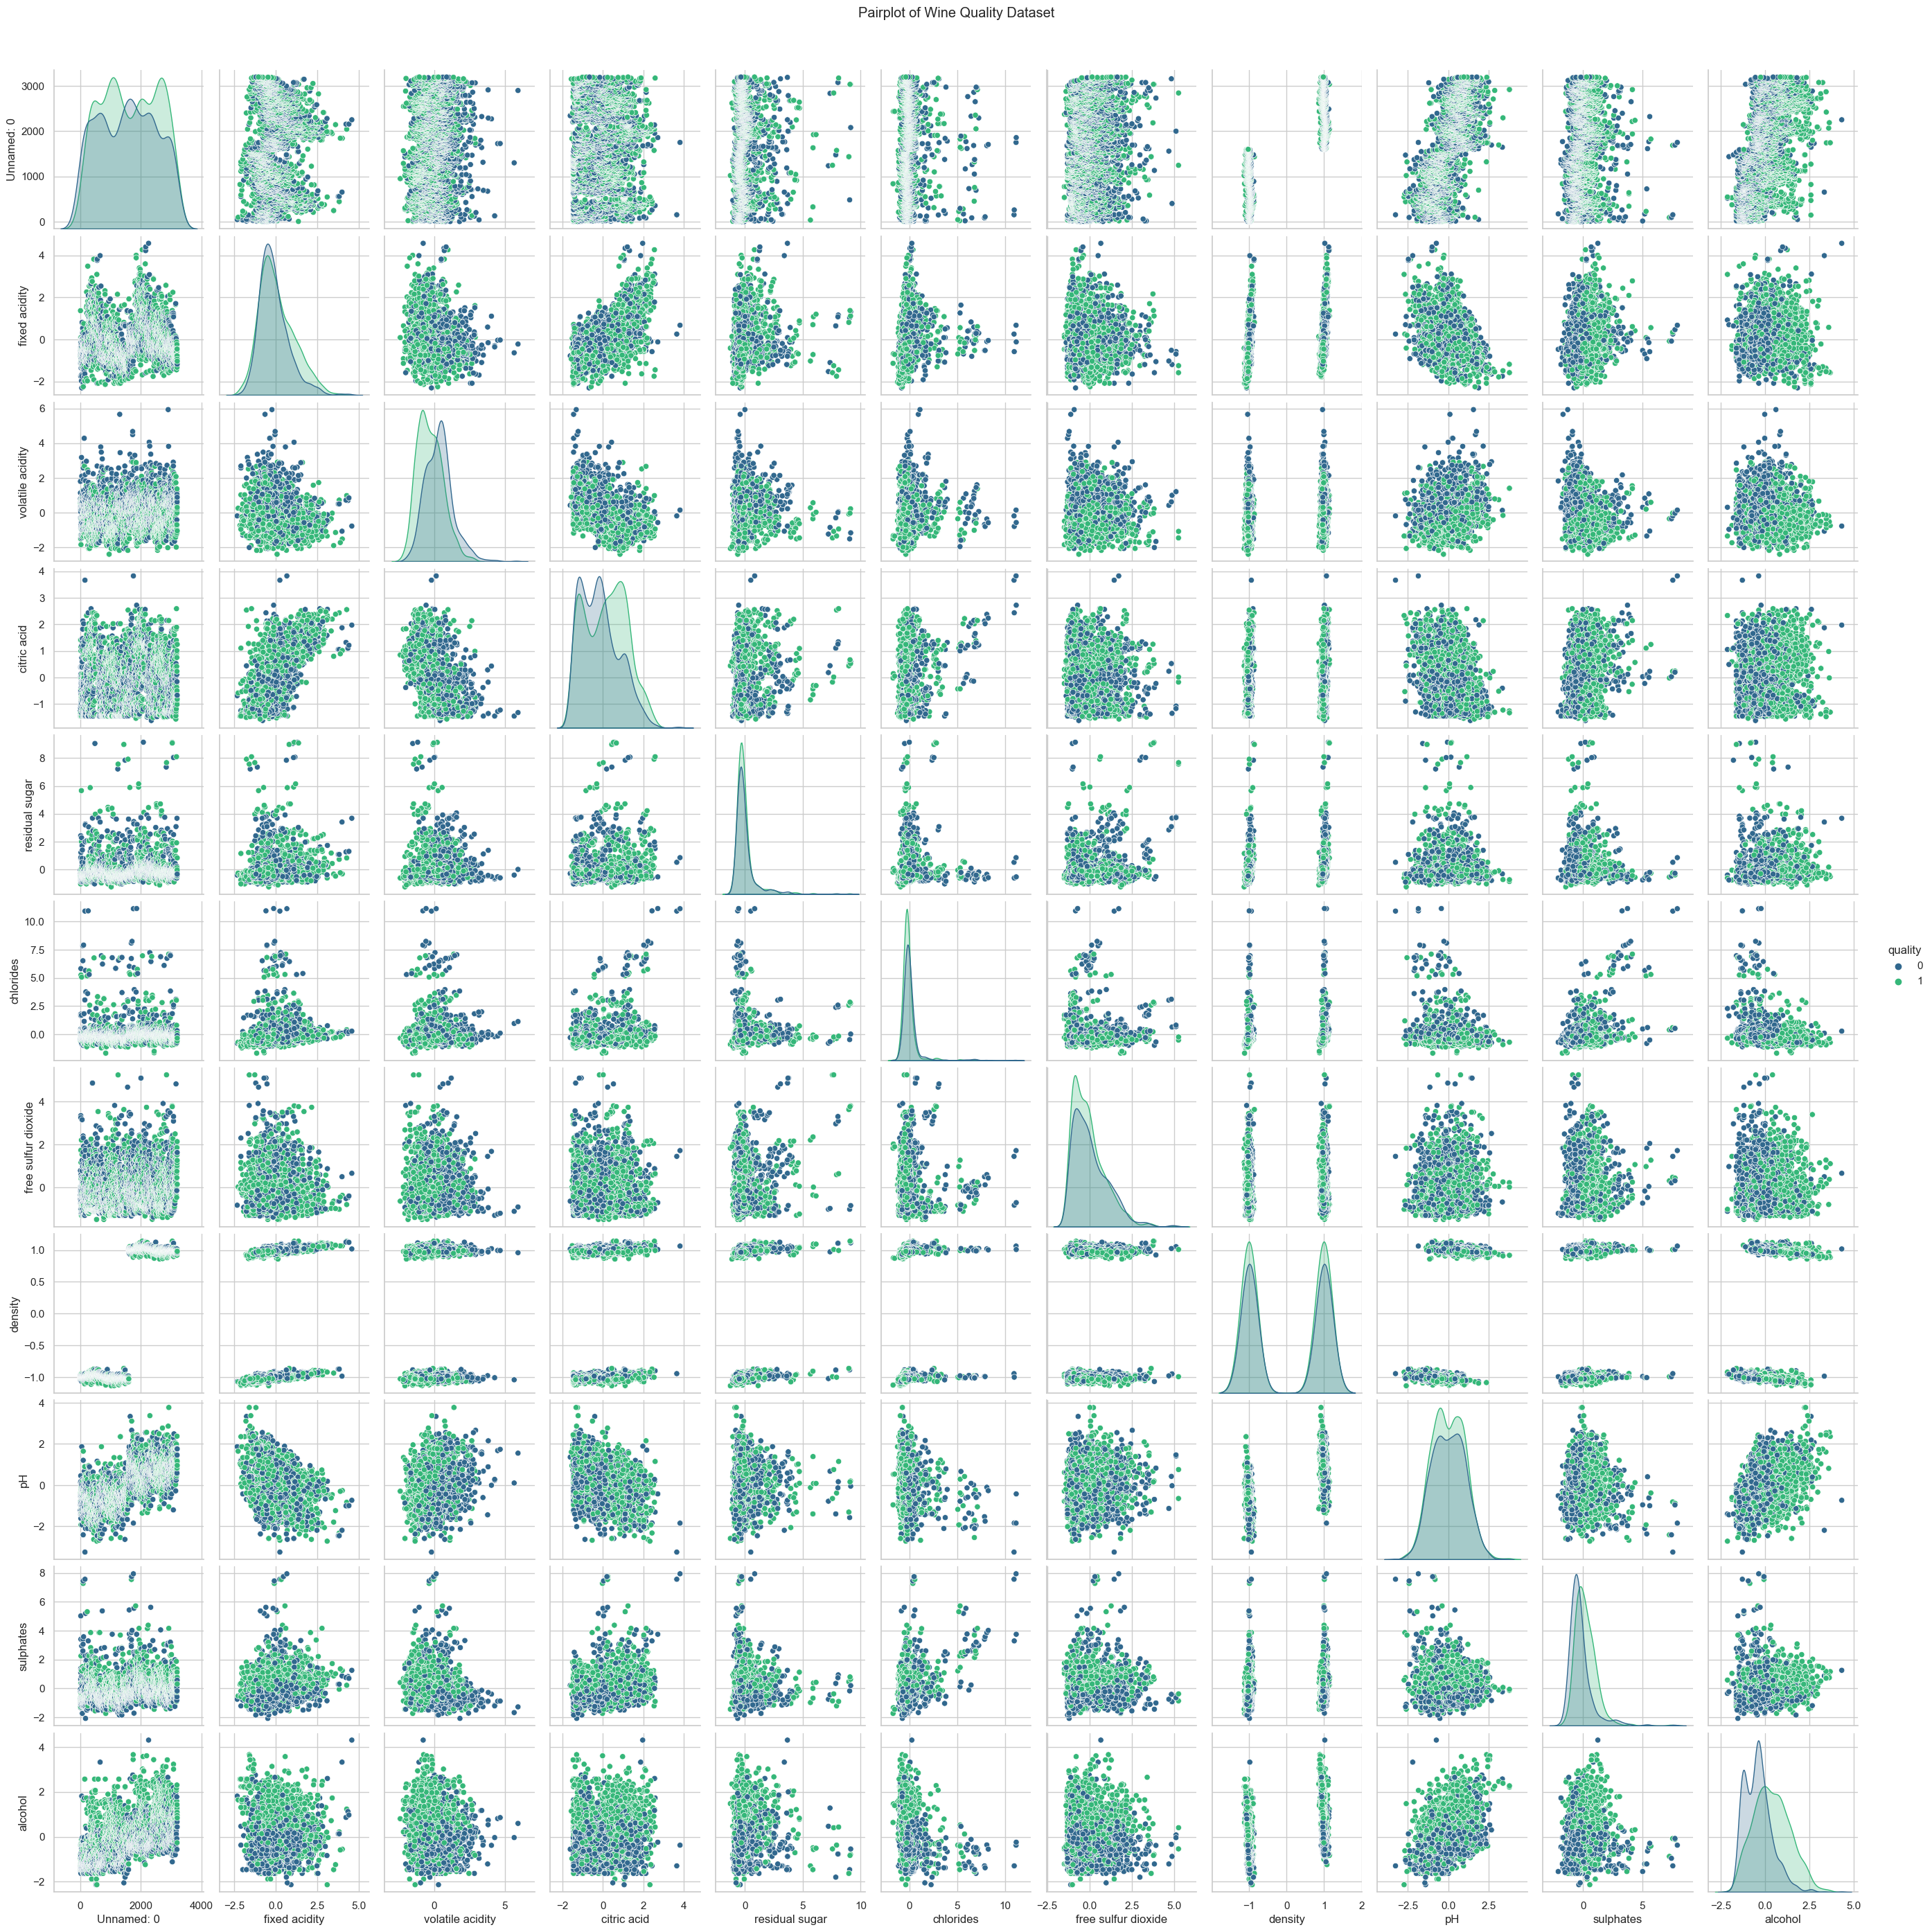

In [13]:
import warnings
warnings.filterwarnings("ignore")
# Visualize the pairplot
sns.pairplot(df_main, hue=target_variable, palette='viridis')
plt.suptitle("Pairplot of Wine Quality Dataset", y=1.02)
plt.show()

We can observe there are outliers in the dataset

#### Univariate Analysis

In [14]:
def detect_outliers_iqr(data, numerical_column):
    """
    Detect and count outliers in a numerical column using the IQR method.

    Parameters:
    - data (pd.DataFrame): Input DataFrame.
    - numerical_column (str): Name of the numerical column.

    Returns:
    - outliers_count (int): Number of outliers.
    """
    try:
        # Calculate quartiles and IQR
        Q1 = data[numerical_column].quantile(0.25)
        Q3 = data[numerical_column].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data[(data[numerical_column] < lower_bound) | (data[numerical_column] > upper_bound)]

        # Count outliers
        outliers_count = len(outliers)

        return outliers_count

    except Exception as e:
        print(f"An error occurred: {e}")
        return 0  # Return 0 in case of an error
    
def remove_outliers(df,numerical_column):
    Q1 = df[numerical_column].quantile(0.25)
    Q3 = df[numerical_column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df = df[(df[numerical_column] >= lower_bound) & (df[numerical_column] <= upper_bound)]

    print(f"Outliers removed in {numerical_column} variable.")
    return df


In [15]:
def plot_histogram_boxplot(df, numerical_column):
    """
    Create side-by-side histogram and boxplot for a numerical column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - numerical_column (str): Name of the numerical column.

    Returns:
    - None
    """
    try:
        # Create subplots
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
        
        # Plot histogram
        sns.histplot(df[numerical_column], bins=20, kde=True, ax=axes[0])
        axes[0].set_title('Histogram')

        # Plot boxplot
        sns.boxplot(x=df[numerical_column], ax=axes[1])
        axes[1].set_title('Boxplot')

        # Detect and count outliers
        Q1 = df[numerical_column].quantile(0.25)
        Q3 = df[numerical_column].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[numerical_column] < lower_bound) | (df[numerical_column] > upper_bound)]

        # Count outliers
        outliers_count = len(outliers)
        print(f"Total number of outliers in '{numerical_column}': {outliers_count}")

        # Adjust layout
        plt.suptitle(f'{numerical_column} - Histogram and Boxplot', y=1.02)
        plt.tight_layout()
        plt.show()


    except Exception as e:
        print(f"An error occurred: {e}")


def get_winsor_upper_limit(x, multiplier=3): 
    upper= x.median() + x.std()*multiplier
    for limit in np.arange(0.001, 0.20, 0.001):
        if np.max(winsorize(x,(0,limit))) < upper:
            return limit
    return None 
    
def apply_winsor(df,current_col):
    dfc = df.copy()
    dfc[current_col] = winsorize(df[current_col],(0,get_winsor_upper_limit(df[current_col])))
    plot_histogram_boxplot(dfc,current_col)
    return dfc

#### fixed acidity

Total number of outliers in 'fixed acidity': 76


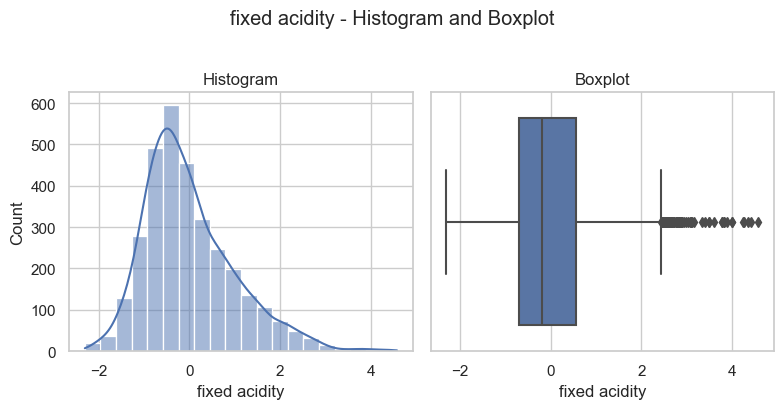

In [16]:
current_col = 'fixed acidity'
plot_histogram_boxplot(df,current_col)

***Observation***
We can observe that the data is right skewed. There are many outliers in the data.

`fixed acidity` : We observe see that outliers are in Upper Quartile Range. So we can handle them using winsorization

Total number of outliers in 'fixed acidity': 76


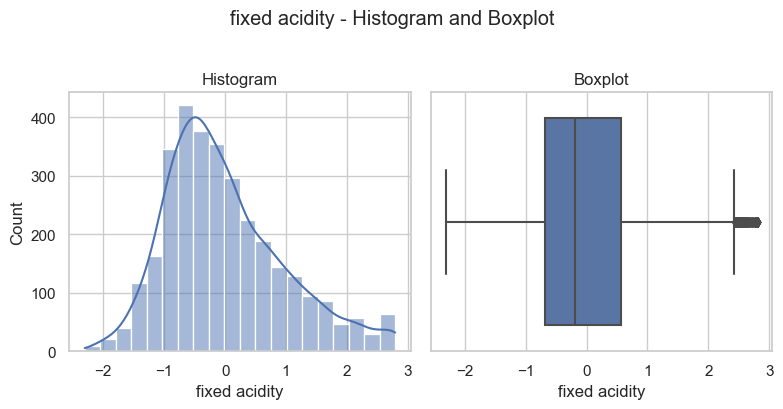

In [17]:
from scipy.stats.mstats import winsorize
# Winsorize the "fixed acidity" column with default limits

df = apply_winsor(df,current_col)

We can observe there are total 76 outliers in this particular column.

#### volatile acidity

In [18]:
current_col = 'volatile acidity'

Total number of outliers in 'volatile acidity': 39


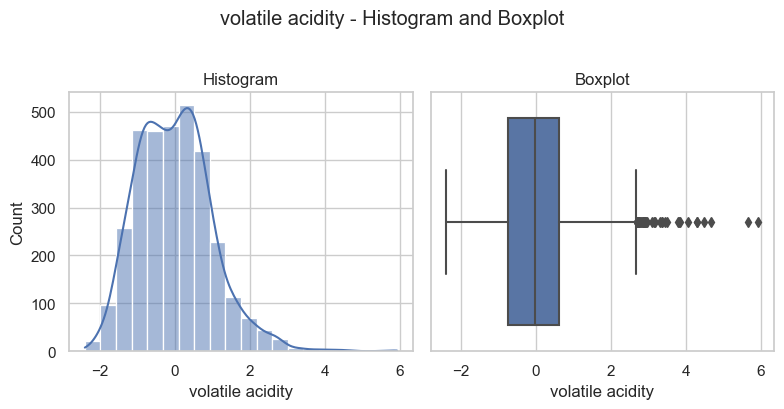

In [19]:
plot_histogram_boxplot(df,current_col)

Total number of outliers in 'volatile acidity': 39


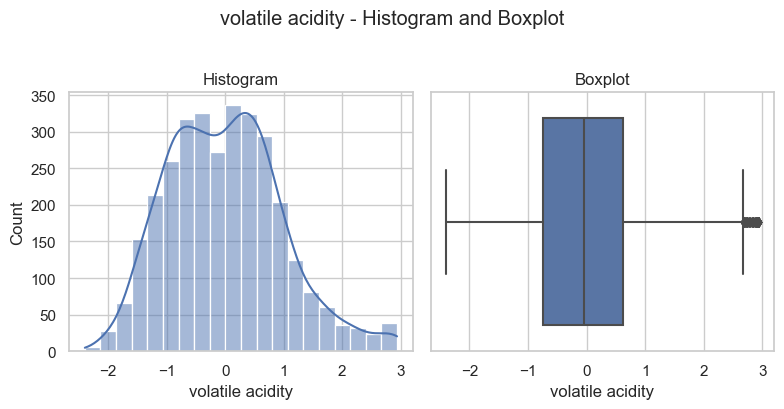

In [20]:
df = apply_winsor(df,current_col)

#### citric acid

Total number of outliers in 'citric acid': 2


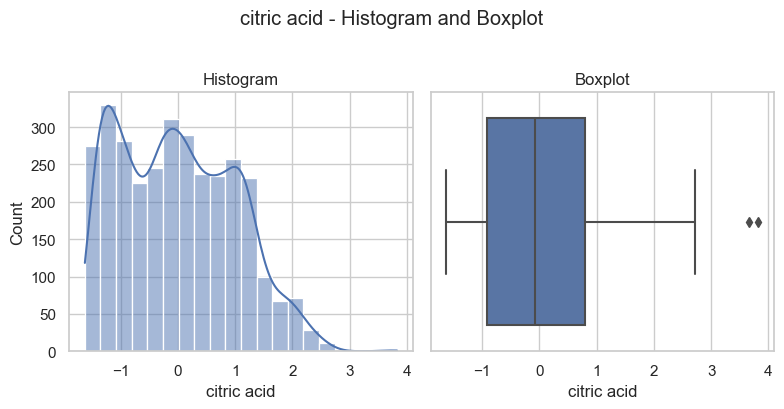

In [21]:
current_col ="citric acid"
plot_histogram_boxplot(df,current_col)

#### residual sugar

Total number of outliers in 'residual sugar': 291


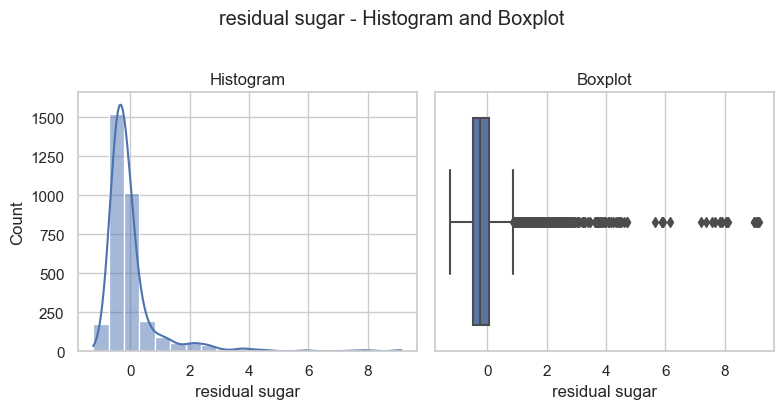

In [22]:
current_col ="residual sugar"
plot_histogram_boxplot(df,current_col)

Total number of outliers in 'residual sugar': 291


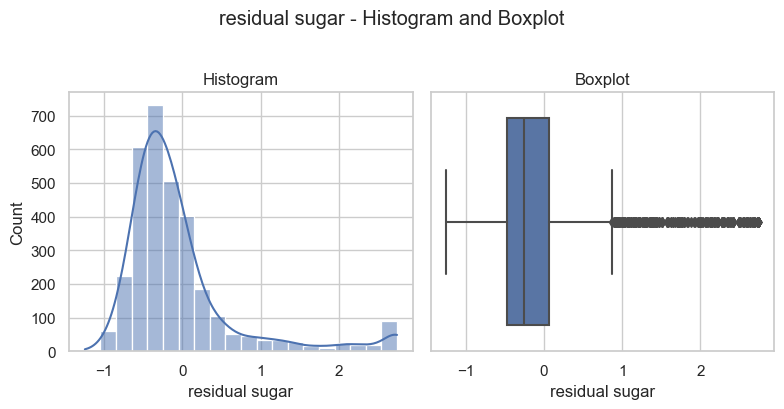

In [23]:
df = apply_winsor(df,current_col)

In [24]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')

#### chlorides

Total number of outliers in 'chlorides': 197


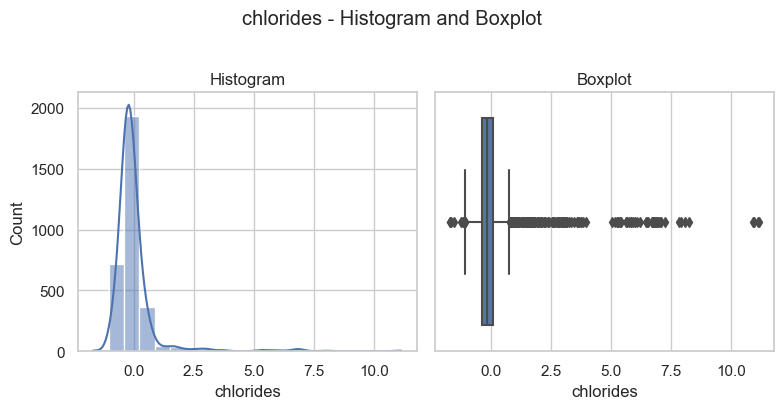

In [25]:
current_col ="chlorides"
plot_histogram_boxplot(df,current_col)

Total number of outliers in 'chlorides': 197


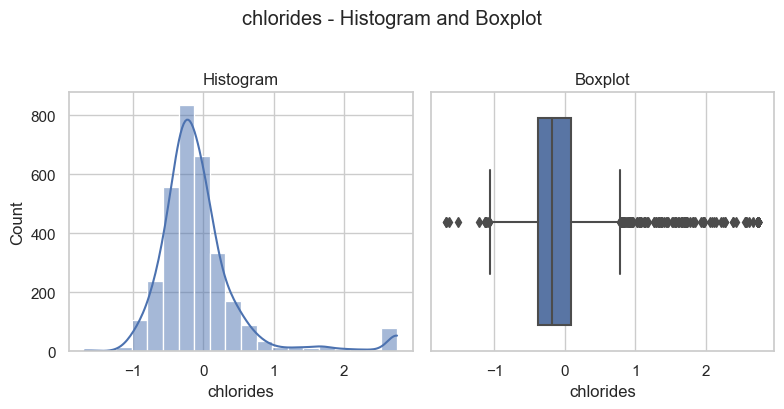

In [26]:
df = apply_winsor(df,current_col)

#### free sulfur dioxide

Total number of outliers in 'free sulfur dioxide': 59


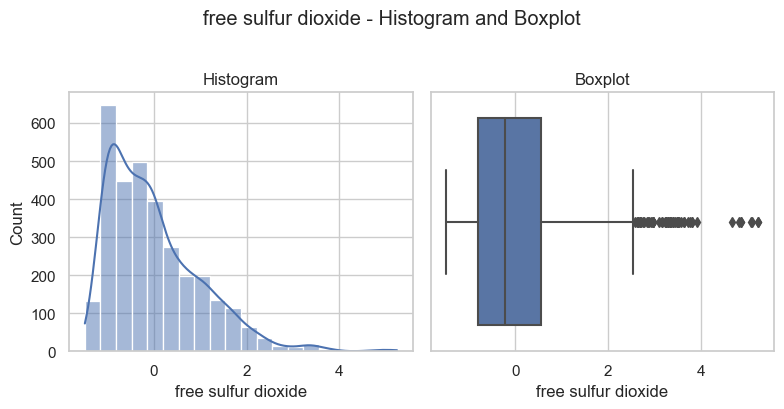

In [27]:
current_col ="free sulfur dioxide"
plot_histogram_boxplot(df,current_col)

Total number of outliers in 'free sulfur dioxide': 59


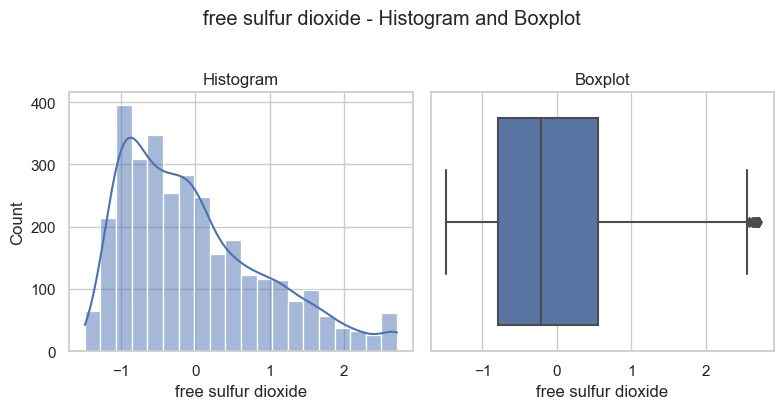

In [28]:
df = apply_winsor(df,current_col)

#### density

Total number of outliers in 'density': 0


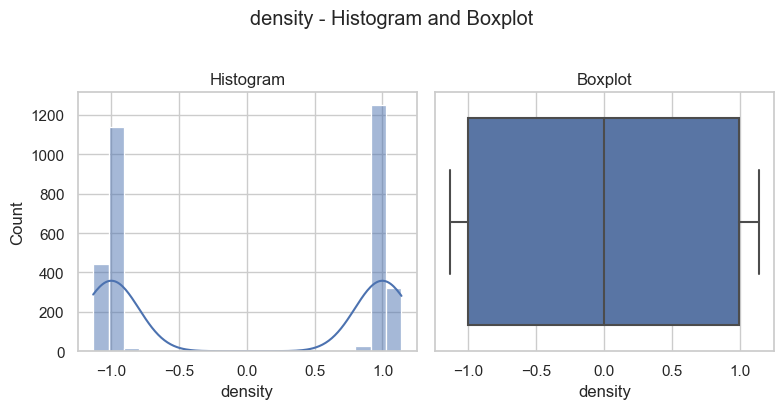

In [29]:
current_col ="density"
plot_histogram_boxplot(df,current_col)

There are no outliers in this column

#### pH

Total number of outliers in 'pH': 6


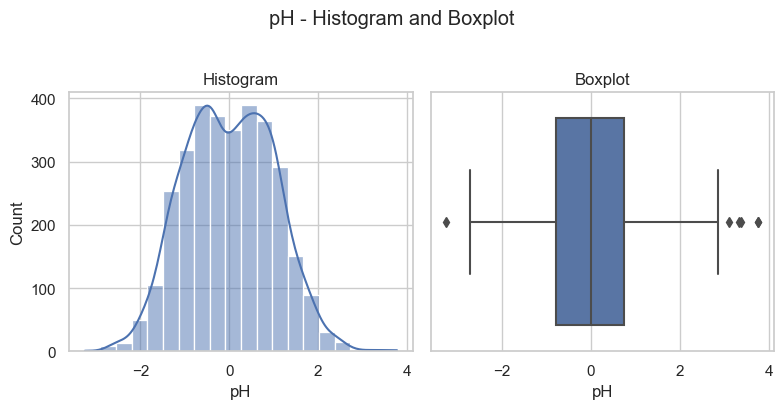

In [30]:
current_col ="pH"
plot_histogram_boxplot(df,current_col)

Total number of outliers in 'pH': 1


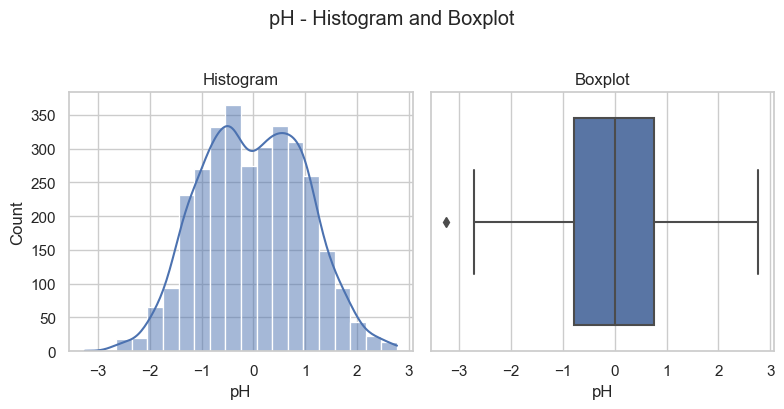

In [31]:
df = apply_winsor(df,current_col)

#### sulphates

Total number of outliers in 'sulphates': 112


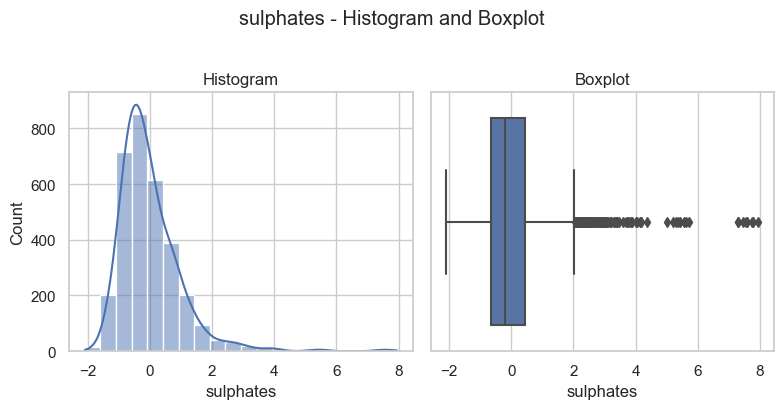

In [32]:
current_col = "sulphates"
plot_histogram_boxplot(df,current_col)

Total number of outliers in 'sulphates': 112


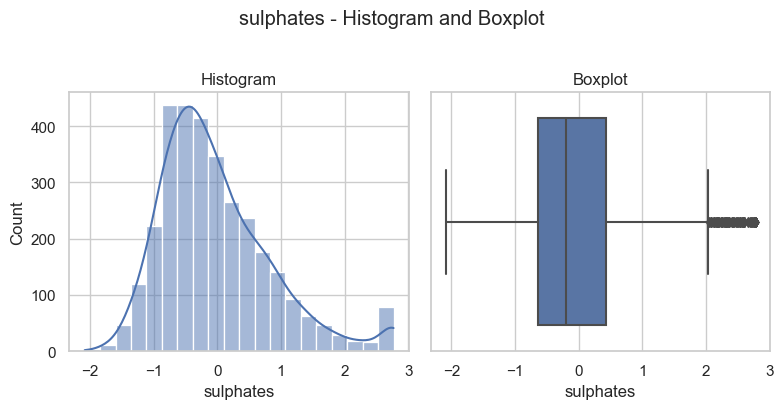

In [33]:
df = apply_winsor(df,current_col)

#### alcohol

Total number of outliers in 'alcohol': 24


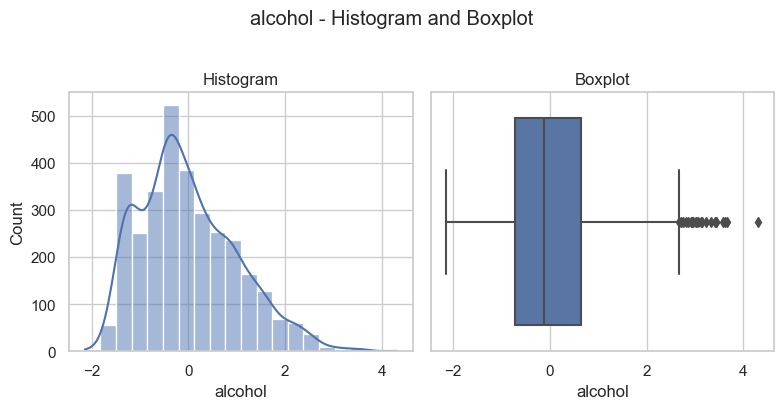

In [34]:
current_col = "alcohol"
plot_histogram_boxplot(df,current_col)

Total number of outliers in 'alcohol': 24


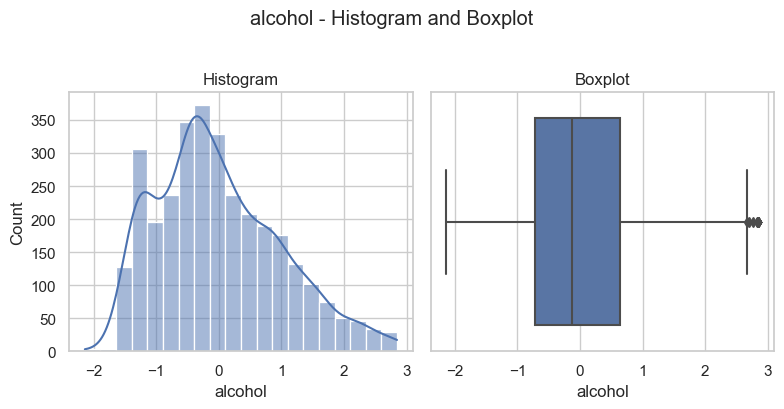

In [35]:
df = apply_winsor(df,current_col)

#### quality

Total number of outliers in 'quality': 0


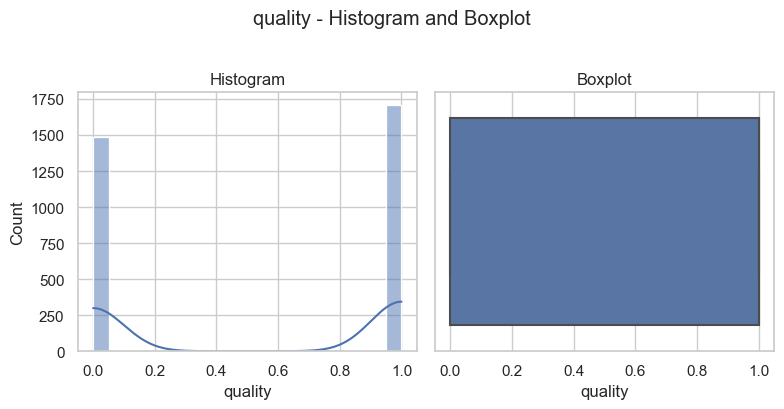

In [36]:
current_col = "quality"
plot_histogram_boxplot(df_main,current_col)

There are no outliers

In [37]:
target_df = df_main[target_variable]

In [38]:
# Apply standard scaler
scaler = StandardScaler()
inp_df = scaler.fit_transform(df)

# Split the data into features (X) and target variable (y)
X = inp_df
y = target_df

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.values
y_test = y_test.values

print('Input Shape', (X_train.shape))
print('Output Shape', X_test.shape)

num_of_features = X_train.shape[0]
print('Number of Features', num_of_features)

Input Shape (2558, 10)
Output Shape (640, 10)
Number of Features 2558


<h1 align='center'> Task 1 - Logistic Regression</h1>

In [39]:
# One Logistic Regression Node
class LogisticRegressionModel:
    def __init__(self, num_iterations=4500, learning_rate=0.001):
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        self.costs = []
        self.w = None
        self.b = None

    def sigmoid(self, result):
        return 1 / (1 + np.exp(-result))

    def initialize_parameters(self, dim):
        self.w = np.zeros((1, dim))
        self.b = 0

    def forward_propagation(self, X_train):
        return self.sigmoid(np.dot(self.w, X_train.T) + self.b)

    def compute_cost(self, a, y):
        m = len(y)
        y_T = y.T
        cost = -1 / m * np.sum(y_T * np.log(a) + (1 - y_T) * np.log(1 - a))
        return cost

    def backward_propagation(self, X, a, y):
        m = len(y)
        dw = (1 / m) * np.dot(X.T, (a - y.T).T)
        db = (1 / m) * np.sum(a - y.T)
        return dw, db

    def update_parameters(self, dw, db):
        self.w = self.w - self.learning_rate * dw.T
        self.b = self.b - self.learning_rate * db

    def fit(self, X_train, y_train):
        m = X_train.shape[0]
        dim = X_train.shape[1]

        self.initialize_parameters(dim)

        for i in range(self.num_iterations):
            # Forward propagation
            a_train = self.forward_propagation(X_train)
            
            # Compute cost
            cost_train = self.compute_cost(a_train, y_train)

            # Backward propagation
            dw, db = self.backward_propagation(X_train, a_train, y_train)

            # Update parameters
            self.update_parameters(dw, db)

            if i % 100 == 0:
                self.costs.append(cost_train)

    def predict(self, X_test):
        final_pred = self.forward_propagation(X_test)
        y_pred = np.zeros((1, X_test.shape[0]))
        for i in range(final_pred.shape[1]):
            if final_pred[0][i] > 0.5:
                y_pred[0][i] = 1
        return y_pred.flatten()
    
    def plot_cost(self):
        plt.plot(self.costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title('Cost reduction over time')
        plt.show()

Accuracy - Logistic Regression (Train): 72.5567%
Accuracy - Logistic Regression (Test): 71.0938%


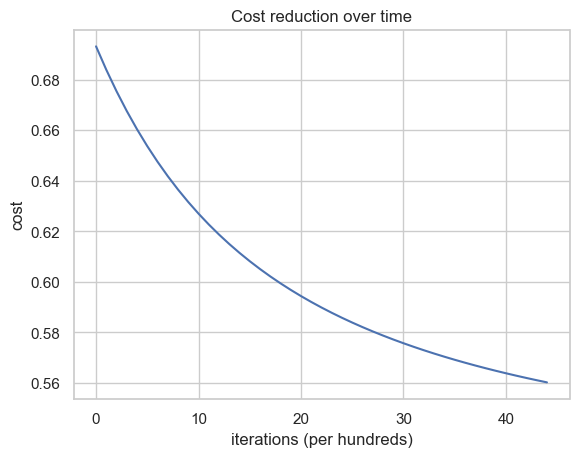

In [40]:
# Testing the simple logistic regression model
logistic_model = LogisticRegressionModel()

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = logistic_model.predict(X_test)

# Evaluate the accuracy of the logistic regression model
accuracy_test = accuracy_score(y_test, y_pred_test)

# Make predictions on the training set
y_pred_train = logistic_model.predict(X_train)

# Evaluate the accuracy on the train set
accuracy_train = np.sum((y_pred_train == y_train) / len(y_train))

print(f"Accuracy - Logistic Regression (Train): {accuracy_train * 100:.4f}%")
print(f"Accuracy - Logistic Regression (Test): {accuracy_test * 100:.4f}%")

logistic_model.plot_cost()

<h1 align='center'> Task 2 - Simple Dynamic Ensemble Logistic Regression</h1>

## With Gradient Formula

I have done backward propagation using the formula I have calculated mathematically

In [41]:
# 3 Nodes Logistic Regression model - one parent and 2 child nodes.
class SimpleDynamicLogisticRegressionModel:
    def __init__(self, num_iterations=4100, learning_rate=0.001):
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        self.costs = []
        self.theta_M = None
        self.theta_L = None
        self.theta_R = None
        self.b_L = 0
        self.b_M = 0
        self.b_R = 0

    def sigmoid(self, result):
        return 1 / (1 + np.exp(-result)) 
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def compute_cost(self, h_L, h_M, h_R, y):
        left_loss = -y * np.log(h_L * h_M) - (1 - y) * np.log((1 - h_L) * h_M)
        right_loss = -y * np.log(h_R * (1 - h_M)) - (1 - y) * np.log((1 - h_R) * (1 - h_M))
        total_loss = np.sum(left_loss + right_loss)
        return total_loss
    
    def fit(self, X_train, y_train):
        input_dim = X_train.shape[1]
        self.theta_M = np.random.rand(input_dim, 1)
        self.theta_L = np.random.rand(input_dim, 1)
        self.theta_R = np.random.rand(input_dim, 1)
        m = len(y_train)
        
        for i in range(self.num_iterations):
            # Forward propagation
            h_M = self.sigmoid(np.dot(X_train, self.theta_M) + self.b_M)
            h_L = self.sigmoid(np.dot(X_train, self.theta_L) + self.b_L)
            h_R = self.sigmoid(np.dot(X_train, self.theta_R) + self.b_R)
            
            # Compute gradients
            error_M = (h_M - y_train.reshape(-1, 1))
            error_L = (h_L - y_train.reshape(-1, 1)) * h_M
            error_R = (h_R - y_train.reshape(-1, 1)) * (1 - h_M)
            
            dtheta_L = np.dot(X_train.T, error_L * self.sigmoid_derivative(h_L)) 
            dtheta_R = np.dot(X_train.T, error_R * self.sigmoid_derivative(h_R))
            dtheta_M = np.dot(X_train.T, error_M)
            
            db_M = np.sum(error_M)
            db_L = np.sum(error_L)
            db_R = np.sum(error_R)
            
            # Update weights
            self.theta_M -= self.learning_rate * dtheta_M
            self.theta_L -= self.learning_rate * dtheta_L
            self.theta_R -= self.learning_rate * dtheta_R
            
            self.b_L -= self.learning_rate * db_L
            self.b_M -= self.learning_rate * db_M
            self.b_R -= self.learning_rate * db_R
            
            if i % 100 == 0:
                cost = self.compute_cost(h_L, h_M, h_R, y_train)
                self.costs.append(cost)
                
    def predict(self, X):

        h_L = self.sigmoid(np.dot(X, self.theta_L) + self.b_L)
        h_M = self.sigmoid(np.dot(X, self.theta_M) + self.b_M)
        h_R = self.sigmoid(np.dot(X, self.theta_R) + self.b_R)

        # Combine the three logistic regression outputs
        pred_left = h_L * h_M + h_R * (1 - h_M)
        pred_right = (1 - h_L) * h_M + (1 - h_R) * (1 - h_M)

        binary_predictions = np.where(pred_left > pred_right, 1, 0)
        
        return binary_predictions
        
    def plot_cost(self):
        plt.plot(self.costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title('Cost reduction over time')
        plt.show()

In [42]:
simple_dynamic = SimpleDynamicLogisticRegressionModel()
simple_dynamic.fit(X_train, y_train)

# Predict on train data
binary_predictions_train = simple_dynamic.predict(X_train)

print("Results using Gradient Formula")
# Evaluate train accuracy
accuracy_train = accuracy_score(binary_predictions_train, y_train)
print(f'Accuracy - Simple Dynamic Ensemble Logistic Regression (Train): {accuracy_train * 100:.4f}%')

# Predict on test data
binary_predictions_test = simple_dynamic.predict(X_test)

# Evaluate accuracy
accuracy_test = accuracy_score(binary_predictions_test, y_test)
print(f'Accuracy - Simple Dynamic Ensemble Logistic Regression (Test): {accuracy_test * 100:.4f}%')

Results using Gradient Formula
Accuracy - Simple Dynamic Ensemble Logistic Regression (Train): 74.7459%
Accuracy - Simple Dynamic Ensemble Logistic Regression (Test): 72.6562%


## Without Gradient Formula - Numerical Differentiation

In [43]:
class EnsembleLogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=1):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.costs = None
        self.bias = np.random.random()
        self.thetaM = np.random.randn(10)
        self.thetaL = np.random.randn(10)
        self.thetaR = np.random.randn(10)

    def sigmoid_activation(self, x):
        return 1 / (1 + np.exp(-x))

    def log_likelihood(self, thetaM, thetaL, thetaR, y):
        pred = ((thetaL**y)*((1-thetaL)**(1-y))*thetaM)+((thetaR**y)*((1-thetaR)**(1-y))*(1-thetaM))
        cost = -np.log(pred)
        return cost
    
    def calculate_derivatives(self,X,y):
        h = 1e-15

        gradM = self.sigmoid_activation(np.dot(X, self.thetaM)+self.bias)
        gradL = self.sigmoid_activation(np.dot(X, self.thetaL)+self.bias)
        gradR = self.sigmoid_activation(np.dot(X, self.thetaR)+self.bias)

        dw_M =(self.log_likelihood(gradM+h,gradL,gradR,y)-self.log_likelihood(gradM-h,gradL,gradR,y))/(2*h)
        dw_L=(self.log_likelihood(gradM,gradL+h,gradR,y)-self.log_likelihood(gradM,gradL-h,gradR,y))/(2*h)
        dw_R=(self.log_likelihood(gradM,gradL,gradR+h,y)-self.log_likelihood(gradM,gradL,gradR-h,y))/(2*h)
        
        # Compute the derivative of the log-likelihood function with respect to the bias
        dw_B = (self.log_likelihood(gradM, gradL, gradR, y) - self.log_likelihood(gradM, gradL, gradR, y))/(2*h)

        return dw_M,dw_L,dw_R,dw_B

    def fit(self, X, y):
        m,num_features = X.shape
        
        self.thetaM =np.zeros(num_features)
        self.thetaL = np.zeros(num_features)
        self.thetaR = np.zeros(num_features)

        for i in range(self.num_iterations):
            
            dw_M,dw_L,dw_R,dw_B = self.calculate_derivatives(X,y)
            
            # Optimize Weights(θ)

            dw_M = (1 / m) *np.dot(X.T,dw_M-y)
            dw_L = (1 / m) *np.dot(X.T,dw_L-y)
            dw_R = (1 / m) *np.dot(X.T,dw_R-y)
            dw_B = (1 / m) *np.sum(dw_B)

            self.thetaM -= self.learning_rate * dw_M
            self.thetaL -= self.learning_rate * dw_L
            self.thetaR -= self.learning_rate * dw_R
            self.bias -= self.learning_rate * dw_B

        return dw_M,dw_L,dw_R,dw_B

    def predict_probababilities(self, X):
        h_theta_M = self.sigmoid_activation(np.dot(X, self.thetaM))
        h_theta_L = self.sigmoid_activation(np.dot(X, self.thetaL))
        h_theta_R = self.sigmoid_activation(np.dot(X, self.thetaR))
        
        prob_left = (h_theta_L * h_theta_M) + (h_theta_R * (1 - h_theta_M))
        prob_right = ((1 - h_theta_L) * h_theta_M) + (1 - h_theta_R) * (1 - h_theta_M)
        return prob_left, prob_right

    def predict(self, X,threshold=0.3):
        prob_left,prob_right = self.predict_probababilities(X)
        selected_prob = np.where(prob_left >= threshold, 1, 0)
        return selected_prob

In [44]:
# Set hyperparameters
learning_rate = 0.1
num_iterations = 500

logistic_model = EnsembleLogisticRegression(learning_rate,num_iterations)
logistic_model.fit(X_train,y_train)

# Predict on train data
binary_predictions_train = logistic_model.predict(X_train)

print("Results using Numerical Differentiation")
# Evaluate train accuracy
accuracy_train = accuracy_score(binary_predictions_train, y_train)
print(f'Accuracy - Simple Dynamic Ensemble Logistic Regression (Train): {accuracy_train * 100:.4f}%')

# Predict on test data
binary_predictions_test = logistic_model.predict(X_test)

# Evaluate accuracy
accuracy_test = accuracy_score(binary_predictions_test, y_test)
print(f'Accuracy - Simple Dynamic Ensemble Logistic Regression (Test): {accuracy_test * 100:.4f}%')

Results using Numerical Differentiation
Accuracy - Simple Dynamic Ensemble Logistic Regression (Train): 74.0813%
Accuracy - Simple Dynamic Ensemble Logistic Regression (Test): 71.8750%


<h1 align='center'>Task 3 - Three Layer Dynamic Ensemble Logistic Regression</h1>

## With Gradient Formula

I have done backward propagation using the formula I have calculated mathematically

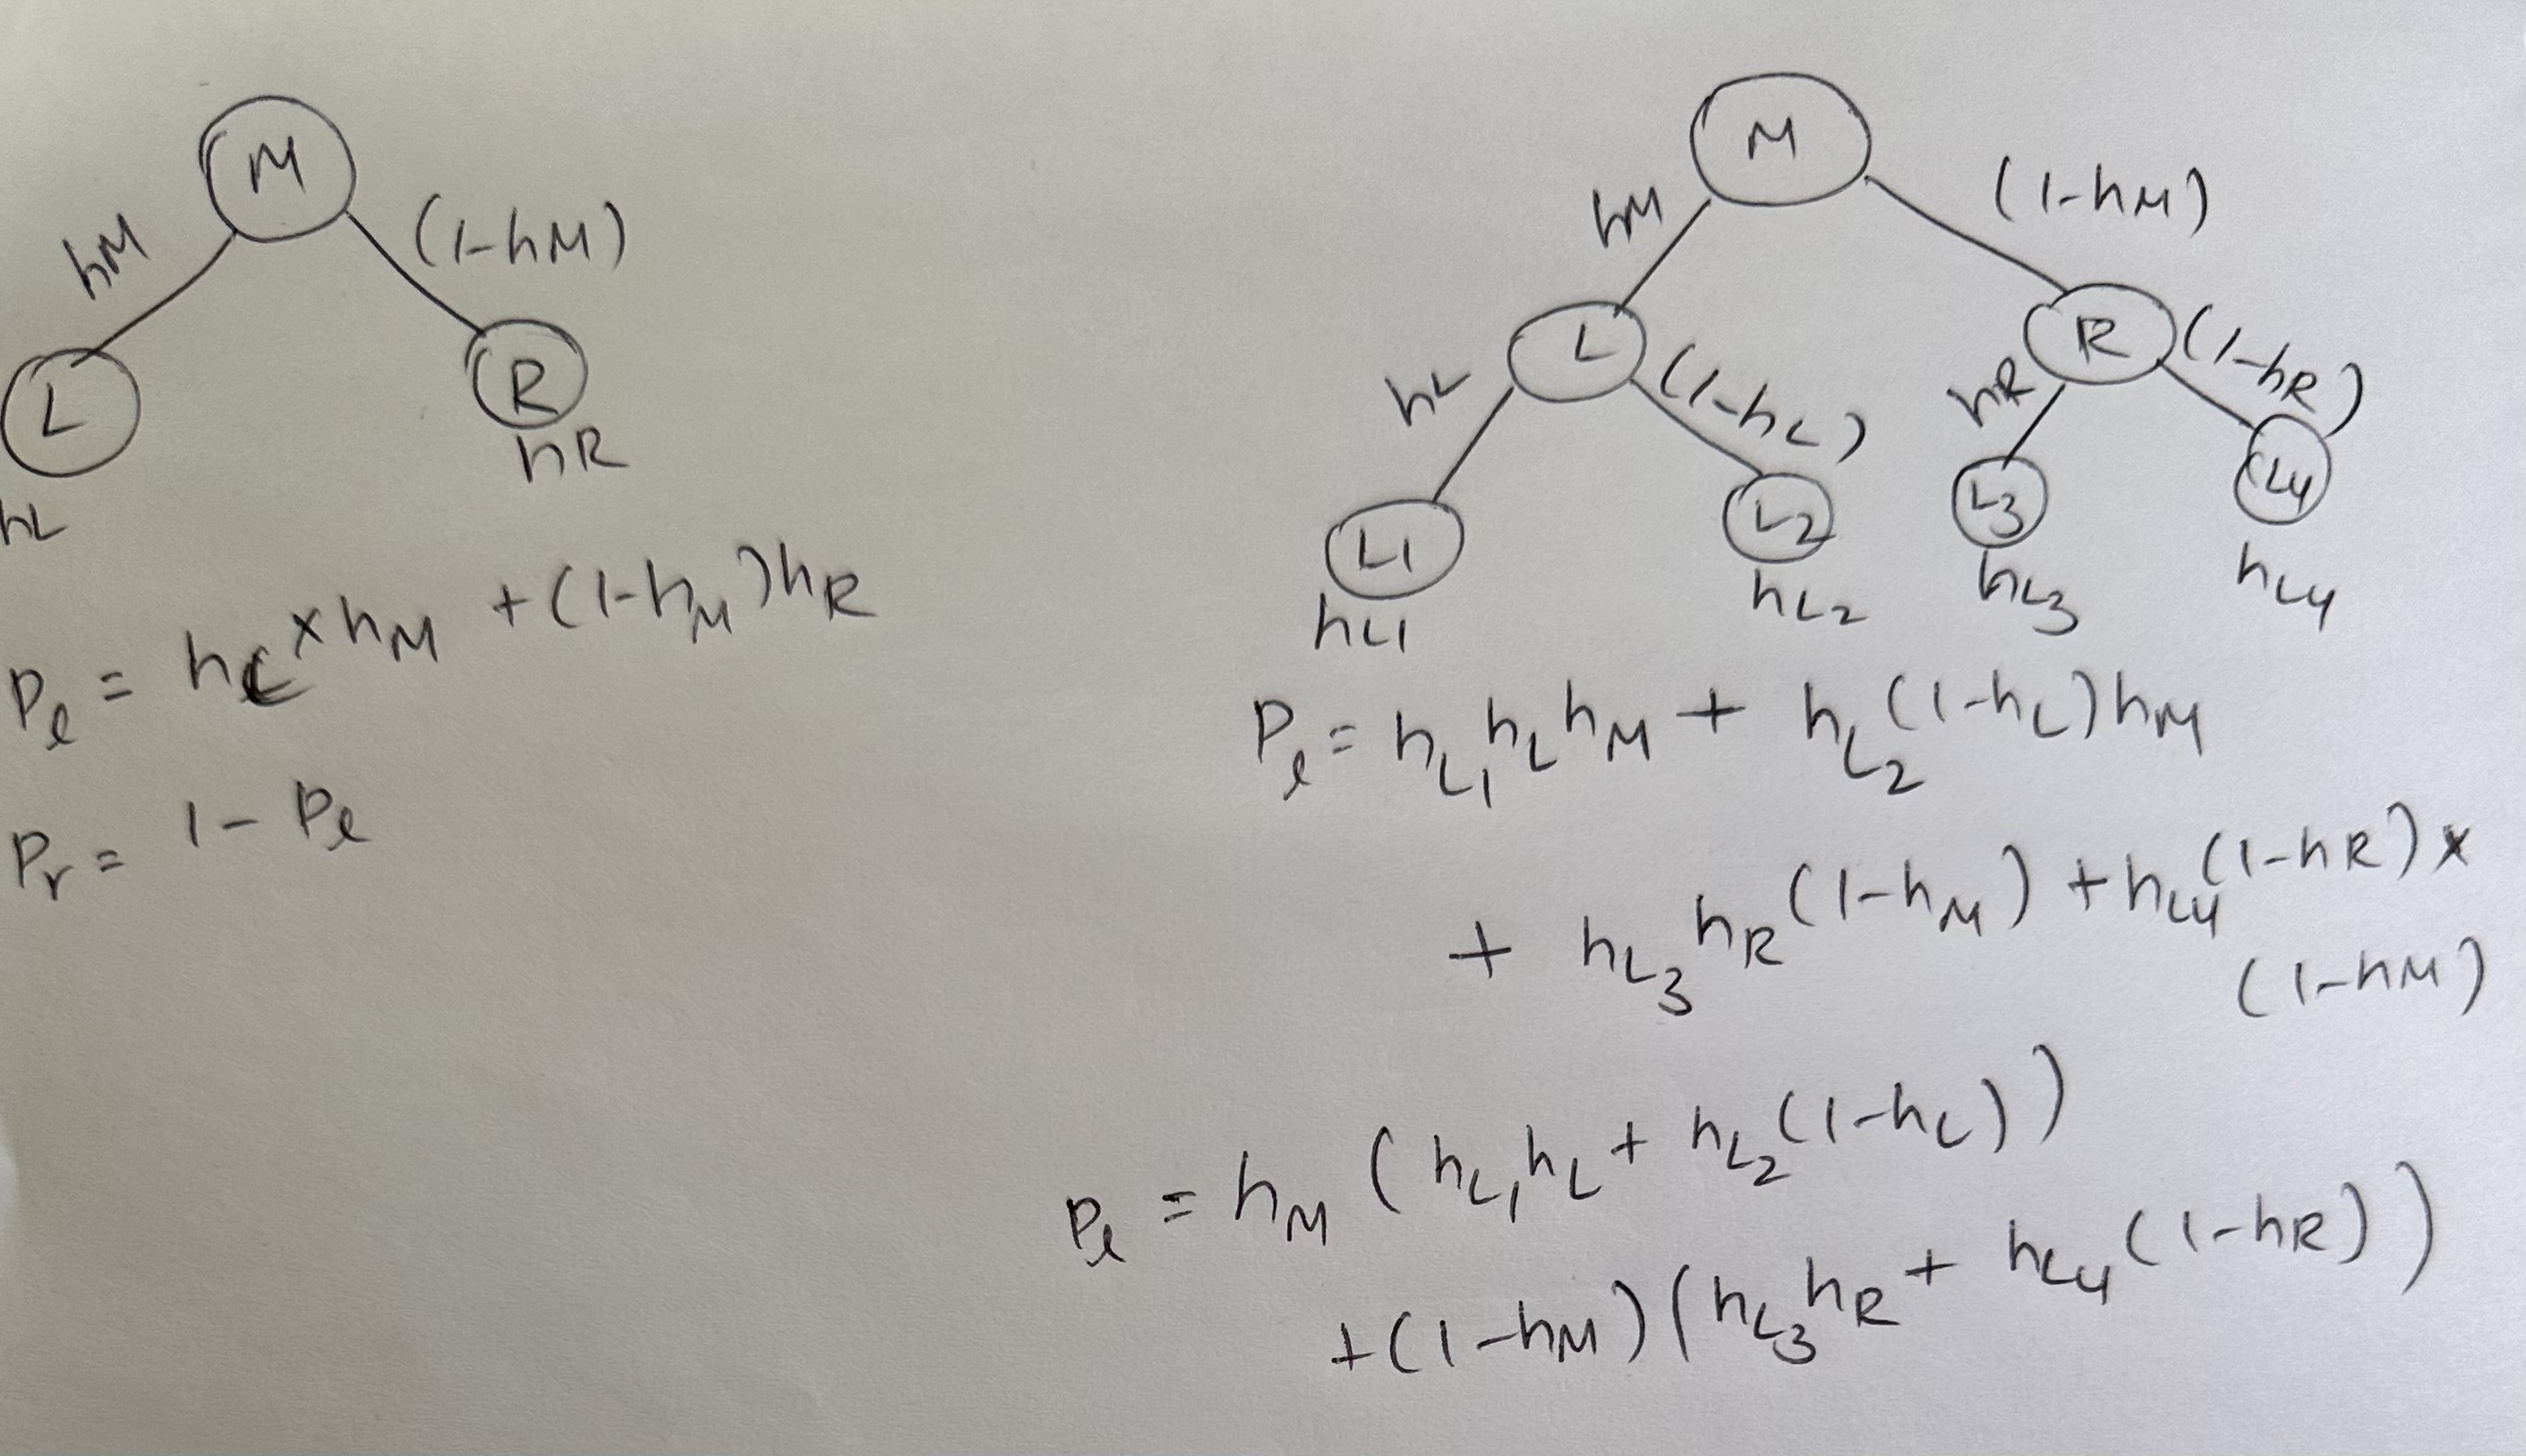

In [45]:
# 3 Layered Dynamic Logistic Regression Model - Using Gradient Formula
class ThreeLayerDynamicLogisticRegressionModel:
    def __init__(self, num_iterations=4100, learning_rate=0.001):
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        self.costs = []
        self.theta_M = None
        self.theta_L = None
        self.theta_R = None
        self.theta_Leaf1 = None
        self.theta_Leaf2 = None
        self.theta_Leaf3 = None
        self.theta_Leaf4 = None
        self.b_L = 0
        self.b_M = 0
        self.b_R = 0
        self.b_Leaf1 = 0
        self.b_Leaf2 = 0
        self.b_Leaf3 = 0
        self.b_Leaf4 = 0

    def sigmoid(self, result):
        return 1 / (1 + np.exp(-result)) 
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def compute_cost(self, h_L, h_M, h_R, y):
        left_loss = -y * np.log(h_L * h_M) - (1 - y) * np.log((1 - h_L) * h_M)
        right_loss = -y * np.log(h_R * (1 - h_M)) - (1 - y) * np.log((1 - h_R) * (1 - h_M))
        total_loss = np.sum(left_loss + right_loss)
        return total_loss
    
    def fit(self, X_train, y_train):
        input_dim = X_train.shape[1]
        self.theta_M = np.random.rand(input_dim, 1)
        self.theta_L = np.random.rand(input_dim, 1)
        self.theta_R = np.random.rand(input_dim, 1)
        self.theta_Leaf1 = np.random.rand(input_dim, 1)
        self.theta_Leaf2 = np.random.rand(input_dim, 1)
        self.theta_Leaf3 = np.random.rand(input_dim, 1)
        self.theta_Leaf4 = np.random.rand(input_dim, 1)
        
        for i in range(self.num_iterations):
            # Forward propagation
            h_M = self.sigmoid(np.dot(X_train, self.theta_M) + self.b_M)
            h_L = self.sigmoid(np.dot(X_train, self.theta_L) + self.b_L)
            h_R = self.sigmoid(np.dot(X_train, self.theta_R) + self.b_R)
            h_Leaf1 = self.sigmoid(np.dot(X_train, self.theta_Leaf1) + self.b_Leaf1)
            h_Leaf2 = self.sigmoid(np.dot(X_train, self.theta_Leaf2) + self.b_Leaf2)
            h_Leaf3 = self.sigmoid(np.dot(X_train, self.theta_Leaf3) + self.b_Leaf3)
            h_Leaf4 = self.sigmoid(np.dot(X_train, self.theta_Leaf4) + self.b_Leaf4)
        
            # Compute errorss
            # TO:DO - change the product here
            error_M = (h_M - y_train.reshape(-1, 1))
            error_L = (h_L - y_train.reshape(-1, 1)) * h_M
            error_R = (h_R - y_train.reshape(-1, 1)) * (1 - h_M)
            error_Leaf1 = (h_Leaf1 - y_train.reshape(-1, 1)) * h_L * h_M
            error_Leaf2 = (h_Leaf2 - y_train.reshape(-1, 1)) * (1 - h_L) * h_M
            error_Leaf3 = (h_Leaf3 - y_train.reshape(-1, 1)) * (h_R) * (1 - h_M)
            error_Leaf4 = (h_Leaf4 - y_train.reshape(-1, 1)) * (1 - h_R) * (1 - h_M)
            
            # Compute gradients
            dtheta_L = np.dot(X_train.T, error_L * self.sigmoid_derivative(h_L)) 
            dtheta_R = np.dot(X_train.T, error_R * self.sigmoid_derivative(h_R))
            dtheta_M = np.dot(X_train.T, error_M)
            dtheta_Leaf1 = np.dot(X_train.T, error_Leaf1 * self.sigmoid_derivative(h_Leaf1)) 
            dtheta_Leaf2 = np.dot(X_train.T, error_Leaf2 * self.sigmoid_derivative(h_Leaf2))
            dtheta_Leaf3 = np.dot(X_train.T, error_Leaf3 * self.sigmoid_derivative(h_Leaf3))
            dtheta_Leaf4 = np.dot(X_train.T, error_Leaf4 * self.sigmoid_derivative(h_Leaf4))
            
            
            db_M = np.sum(error_M)
            db_L = np.sum(error_L)
            db_R = np.sum(error_R)
            db_Leaf1 = np.sum(error_Leaf1)
            db_Leaf2 = np.sum(error_Leaf2)
            db_Leaf3 = np.sum(error_Leaf3)
            db_Leaf4 = np.sum(error_Leaf4)
            
            # Update parameters
            self.theta_M -= self.learning_rate * dtheta_M
            self.theta_L -= self.learning_rate * dtheta_L
            self.theta_R -= self.learning_rate * dtheta_R
            self.theta_Leaf1 -= self.learning_rate * dtheta_Leaf1
            self.theta_Leaf2 -= self.learning_rate * dtheta_Leaf2
            self.theta_Leaf3 -= self.learning_rate * dtheta_Leaf3
            self.theta_Leaf4 -= self.learning_rate * dtheta_Leaf4
            
            
            self.b_L -= self.learning_rate * db_L
            self.b_M -= self.learning_rate * db_M
            self.b_R -= self.learning_rate * db_R
            self.b_Leaf1 -= self.learning_rate * db_Leaf1
            self.b_Leaf2 -= self.learning_rate * db_Leaf2
            self.b_Leaf3 -= self.learning_rate * db_Leaf3
            self.b_Leaf4 -= self.learning_rate * db_Leaf4
            
                
    def predict(self, X):

        h_L = self.sigmoid(np.dot(X, self.theta_L) + self.b_L)
        h_M = self.sigmoid(np.dot(X, self.theta_M) + self.b_M)
        h_R = self.sigmoid(np.dot(X, self.theta_R) + self.b_R)
        h_Leaf1 = self.sigmoid(np.dot(X, self.theta_Leaf1) + self.b_Leaf1)
        h_Leaf2 = self.sigmoid(np.dot(X, self.theta_Leaf2) + self.b_Leaf2)
        h_Leaf3 = self.sigmoid(np.dot(X, self.theta_Leaf3) + self.b_Leaf3)
        h_Leaf4 = self.sigmoid(np.dot(X, self.theta_Leaf4) + self.b_Leaf4)

        # Combine the three logistic regression outputs
        
        pred_left = (h_Leaf1 * h_L + h_Leaf2 * (1 - h_L)) * h_M + (h_Leaf3 * h_R + h_Leaf4 * (1 - h_R)) * (1 - h_M)
        pred_right = 1 - pred_left

        binary_predictions = np.where(pred_left > pred_right, 1, 0)
        
        return binary_predictions
        
    def plot_cost(self):
        plt.plot(self.costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title('Cost reduction over time')
        plt.show()

In [46]:
three_layer = ThreeLayerDynamicLogisticRegressionModel()
three_layer.fit(X_train, y_train)

# Predict on train data
binary_predictions_train = three_layer.predict(X_train)

print("Results using Gradient Formula")
# Evaluate train accuracy
accuracy_train = accuracy_score(binary_predictions_train, y_train)
print(f'Accuracy - Three Layer Dynamic Ensemble Logistic Regression (Train): {accuracy_train * 100:.4f}%')

# Predict on test data
binary_predictions_test = simple_dynamic.predict(X_test)

# Evaluate accuracy
accuracy_test = accuracy_score(binary_predictions_test, y_test)
print(f'Accuracy - Three Layer Dynamic Ensemble Logistic Regression (Test): {accuracy_test * 100:.4f}%')

Results using Gradient Formula
Accuracy - Three Layer Dynamic Ensemble Logistic Regression (Train): 74.6677%
Accuracy - Three Layer Dynamic Ensemble Logistic Regression (Test): 72.6562%


<h1 align='center'>Task 4 - Arbitrary Number Of Layers</h1>

## Without Gradient Formula - Numerical Differentiation

In [47]:
# N Layered Dynamic Logistic Regression Model - Using Numerical Differentiation
class EnsembleArbitraryLayers:
    def __init__(self, num_layers=1, num_iterations=4100, learning_rate=0.001):
        self.num_layers = num_layers
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        
    @staticmethod
    def sigmoid_activation(z):
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, weights, bias, input_data, labels, probabilities):
        leaf_nodes = np.arange(2**(self.num_layers-1)-1, 2**self.num_layers-1)
        probability_Y1 = 0
        probability_Y0 = 0

        for leaf in leaf_nodes:
            probability_left = probabilities[leaf]
            probability_right = 1 - probabilities[leaf]

            while leaf != 0:
                parent_node = (leaf - 1) // 2
                if ((leaf - 1) / 2) == parent_node:
                    probability_left *= probabilities[parent_node]
                    probability_right *= probabilities[parent_node]
                else:
                    probability_left *= (1 - probabilities[parent_node])
                    probability_right *= (1 - probabilities[parent_node])
                leaf = parent_node

            probability_Y1 += probability_left
            probability_Y0 += probability_right

        sample_size = input_data.shape[0]
        labels_transposed = labels.T
        cost_value = (-1 / sample_size) * np.sum(labels_transposed * np.log(probability_Y1) + (1 - labels_transposed) * np.log(probability_Y0))
        return cost_value

    def predict(self, probabilities):
        leaf_nodes = np.arange(2**(self.num_layers-1)-1, 2**self.num_layers-1)
        probability_Y1 = 0
        probability_Y0 = 0

        for leaf in leaf_nodes:
            probability_left = probabilities[leaf]
            probability_right = (1 - probabilities[leaf])

            while leaf != 0:
                parent_node = (leaf - 1) // 2
                if ((leaf - 1) / 2) == parent_node:
                    probability_left *= probabilities[parent_node]
                    probability_right *= probabilities[parent_node]
                else:
                    probability_left *= (1 - probabilities[parent_node])
                    probability_right *= (1 - probabilities[parent_node])
                leaf = parent_node

            probability_Y1 += probability_left
            probability_Y0 += probability_right
        
        return probability_Y1, probability_Y0

    def optimize(self, weights, bias, input_data, labels):
        sample_size = input_data.shape[0]
        weight_gradients = np.zeros((2**self.num_layers - 1, input_data.shape[1]))
        step_size = 1e-15
        labels_transposed = labels.T
        final_output = self.sigmoid_activation(np.dot(weights, input_data.T) + bias)

        cost_value = self.compute_cost(weights, bias, input_data, labels, final_output)

        # Gradient calculation
        for i in range(len(weights)):
            for j in range(len(weights[i])):
                weights_temp = weights.copy()
                weights_temp[i][j] = weights[i][j] + step_size
                final_output_temp = self.sigmoid_activation(np.dot(weights_temp, input_data.T) + bias)
                cost_derivative = self.compute_cost(weights_temp, bias, input_data, labels, final_output_temp)
                weight_gradients[i][j] = (cost_derivative - cost_value) / step_size

        bias_gradient = (1 / sample_size) * np.sum(final_output - labels_transposed)
        gradients = {"weights_gradient": weight_gradients, "bias_gradient": bias_gradient}
        return gradients, cost_value
    
    def fit(self, input_data, labels):
        costs = []
        random_number = np.random.rand(2**self.num_layers - 1, 1)
        weights = np.tile(random_number, input_data.shape[1])
        bias = 0
        for i in range(self.num_iterations):
            grads, cost = self.optimize(weights, bias, input_data, labels)
            dw = grads["weights_gradient"]
            db = grads["bias_gradient"]

            # Weight update
            weights = weights - (self.learning_rate * dw)
            bias = bias - (self.learning_rate * db)

            if i % 100 == 0:
                costs.append(cost)

        coefficients = {"weights": weights, "bias": bias}
        gradients = {"dw": dw, "db": db}
        return coefficients, gradients, costs

In [48]:
# Initialize model parameters
num_layers = 3 # Example: 3 layers
learning_rate = 0.01
num_iterations = 4100

# Create an instance of the EnsembleArbitraryLayers class
model = EnsembleArbitraryLayers(num_layers, num_iterations, learning_rate)

# Train the model
coefficients, gradients, costs = model.fit(X_train, y_train)

print("Results using Numerical Differentiation")
# Train Data
final_predictions = model.sigmoid_activation(np.dot(coefficients['weights'], X_train.T) + coefficients['bias'])
prob_left, prob_right = model.predict(final_predictions)

# Predict on train data
# binary_predictions_train = np.where(prob_left > prob_right, 1, 0)

# Evaluate train accuracy
accuracy_train = accuracy_score(binary_predictions_train, y_train)
print(f'Accuracy - Three Layer Dynamic Ensemble Logistic Regression (Train): {accuracy_train * 100:.2f}%')

# Test Data
final_predictions = model.sigmoid_activation(np.dot(coefficients['weights'], X_test.T) + coefficients['bias'])
prob_left, prob_right = model.predict(final_predictions)

# Predict on test data
# binary_predictions_test = np.where(prob_left > prob_right, 1, 0)

# Evaluate accuracy
accuracy_test = accuracy_score(binary_predictions_test, y_test)
print(f'Accuracy - Three Layer Dynamic Ensemble Logistic Regression (Test): {accuracy_test * 100:.2f}%')

Results using Numerical Differentiation
Accuracy - Three Layer Dynamic Ensemble Logistic Regression (Train): 74.67%
Accuracy - Three Layer Dynamic Ensemble Logistic Regression (Test): 72.66%


## With Gradient Formula

I have done backward propagation using the formula I have calculated mathematically and generalised it for N layers

In [49]:
# N Layered Dynamic Logistic Regression Model - Using Gradient Formula
class NLayerDynamicLogisticRegressionModel:
    def __init__(self, num_iterations=4100, learning_rate=0.001, layers=3):
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        self.layers = layers
        self.costs = []
        self.initialize_parameters()

    def initialize_parameters(self):
        # Number of nodes in a binary tree = 2^(layers) - 1
        num_nodes = 2 ** self.layers - 1
        self.thetas = {i: None for i in range(num_nodes)}
        self.biases = {i: 0 for i in range(num_nodes)}

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z)) 
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def compute_cost(self, predictions, y):
        # Binary Cross-Entropy Loss
        loss = -y * np.log(predictions) - (1 - y) * np.log(1 - predictions)
        return np.sum(loss)

    def fit(self, X_train, y_train):
        input_dim = X_train.shape[1]

        # Initialize thetas
        for key in self.thetas:
            self.thetas[key] = np.random.rand(input_dim, 1)

        for i in range(self.num_iterations):
            predictions, cache = self.forward_propagation(X_train)
            cost = self.compute_cost(predictions, y_train)
            self.costs.append(cost)
            self.backward_propagation(X_train, y_train, cache)

    def forward_propagation(self, X):
        cache = {}
        num_nodes = len(self.thetas)

        # Forward propagate through each layer
        for i in range(num_nodes):
            if i == 0:  # Root node
                cache[i] = self.sigmoid(np.dot(X, self.thetas[i]) + self.biases[i])
            else:
                parent_index = (i - 1) // 2
                h_parent = cache[parent_index]
                z = np.dot(X, self.thetas[i]) + self.biases[i]
                cache[i] = self.sigmoid(z) * h_parent

        # Last layer outputs
        last_layer_indices = range(num_nodes - 2**self.layers + 1, num_nodes)
        final_output = sum([cache[i] for i in last_layer_indices]) / len(last_layer_indices)

        return final_output, cache

    def backward_propagation(self, X, y, cache):
        num_nodes = len(self.thetas)
        deltas = {}

        # Backward propagate from the last layer
        for i in reversed(range(num_nodes)):
            if i >= num_nodes - 2**self.layers + 1:
                deltas[i] = (cache[i] - y.reshape(-1, 1)) * self.sigmoid_derivative(cache[i])
            else:
                child_indices = [2 * i + 1, 2 * i + 2]
                deltas[i] = sum([deltas[j].reshape(-1, 1) for j in child_indices if j in deltas]) * self.sigmoid_derivative(cache[i])

            # Update parameters
            gradient = np.dot(X.T, deltas[i])
            self.thetas[i] -= self.learning_rate * gradient
            self.biases[i] -= self.learning_rate * np.sum(deltas[i])

    def predict(self, X):
        predictions, _ = self.forward_propagation(X)
        return (predictions > 0.5).astype(int)

    def plot_cost(self):
        plt.plot(self.costs)
        plt.ylabel('cost')
        plt.xlabel('iterations')
        plt.title('Cost reduction over time')
        plt.show()

In [50]:
# Testing the code on 4 layers
model_4 = NLayerDynamicLogisticRegressionModel(layers=4)

model_4.fit(X_train, y_train)

# Predict on train data
binary_predictions_train = model_4.predict(X_train)

print("Results using Gradient Formula")
# Evaluate train accuracy
accuracy_train = accuracy_score(binary_predictions_train, y_train)
print(f'Accuracy - Four Layer Dynamic Ensemble Logistic Regression (Train): {accuracy_train * 100:.4f}%')

# Predict on test data
binary_predictions_test = model_4.predict(X_test)

# Evaluate accuracy
accuracy_test = accuracy_score(binary_predictions_test, y_test)
print(f'Accuracy - Four Layer Dynamic Ensemble Logistic Regression (Test): {accuracy_test * 100:.4f}%')

Results using Gradient Formula
Accuracy - Four Layer Dynamic Ensemble Logistic Regression (Train): 74.7068%
Accuracy - Four Layer Dynamic Ensemble Logistic Regression (Test): 72.6562%
